# PRINCIPAL COMPONENT ANALYSIS (PCA)

## Loading and Visualizing the Olivetti Faces Dataset

a) Load the Olivetti Faces Dataset using sklearn.datasets.fetch_olivetti_faces.

b) Display a few random images from the dataset to understand the structure of the data.


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


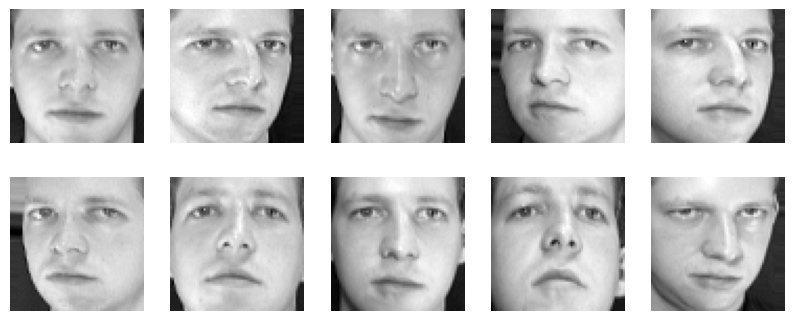

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target

# Display a few sample images
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax[i // 5, i % 5].imshow(X[i].reshape(64, 64), cmap='gray')
    ax[i // 5, i % 5].axis('off')
plt.show()



## Performing PCA and Visualizing Principal Components
AIM: Understand how PCA transforms data and visualize the "eigenfaces" (principal components as images).

c) Apply PCA with a large number of components (e.g., 50) to capture most of the variance.

d) Display the first few principal components as "eigenfaces" to show what each principal component captures visually.

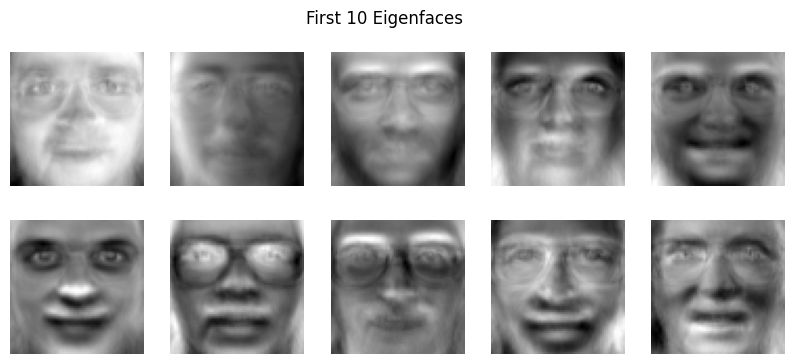

In [2]:
from sklearn.decomposition import PCA

# Apply PCA
n_components = 50
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X)

# Visualize the first 10 eigenfaces
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax[i // 5, i % 5].imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    ax[i // 5, i % 5].axis('off')
plt.suptitle("First 10 Eigenfaces")
plt.show()


## Variance Explained by Principal Components

AIM: Identify the number of components needed to retain a significant amount of variance.

e) Plot the cumulative variance explained by each component.

f) Find the minimum number of components required to capture, say, 95% of the variance.

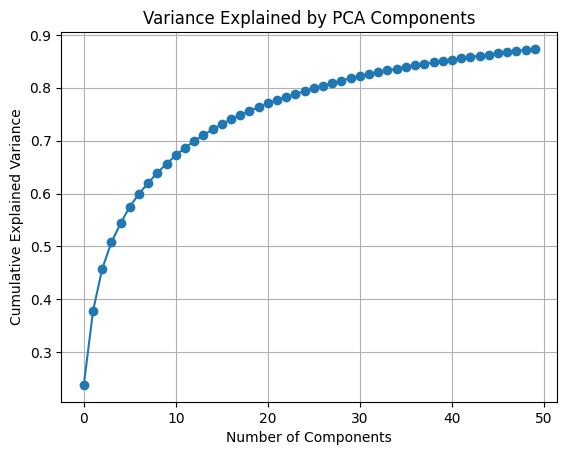

In [3]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid()
plt.show()


## Reconstruction with Reduced Components
AIM: Understand the effect of dimensionality reduction on image quality.

g) Reconstruct a few images from PCA-transformed data using different numbers of components (e.g., 10, 50, 100).

h) Display and compare the reconstructed images to the original ones.

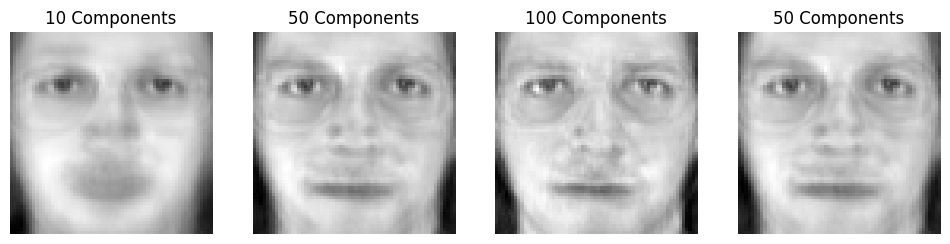

In [4]:
# Reconstruct an image with different numbers of components
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
components = [10, 50, 100, n_components]

for i, n in enumerate(components):
    pca_n = PCA(n_components=n, whiten=True).fit(X)
    X_pca_n = pca_n.transform(X)
    X_reconstructed = pca_n.inverse_transform(X_pca_n)
    ax[i].imshow(X_reconstructed[0].reshape(64, 64), cmap='gray')
    ax[i].set_title(f"{n} Components")
    ax[i].axis('off')
plt.show()


##PCA for Dimensionality Reduction and Classification

AIM: Explore the effect of PCA on classification accuracy using a simple linear classifier.

i) Apply PCA to reduce the data dimensionality, keeping 50 components.

j) Train a Logistic Regression classifier on the reduced dataset.

k) Evaluate and compare the classifier’s accuracy on the original vs. reduced datasets.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


# Train on original data
clf_original = LogisticRegression(max_iter=1000)
clf_original.fit(X_train, y_train)
y_pred_original = clf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Train on PCA-reduced data
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy on original data: {accuracy_original * 100:.2f}%")
print(f"Accuracy on PCA-reduced data ({n_components} components): {accuracy_pca * 100:.2f}%")

Accuracy on original data: 94.17%
Accuracy on PCA-reduced data (50 components): 92.50%


## Grid Search for Optimal Number of PCA Components

AIM: Find the optimal number of components for the best classification accuracy.

l) Use cross-validation to evaluate classifier accuracy for various numbers of PCA components (e.g., 10, 20, 50, 100).

m) Plot accuracy vs. the number of components to observe the impact of dimensionality on classification

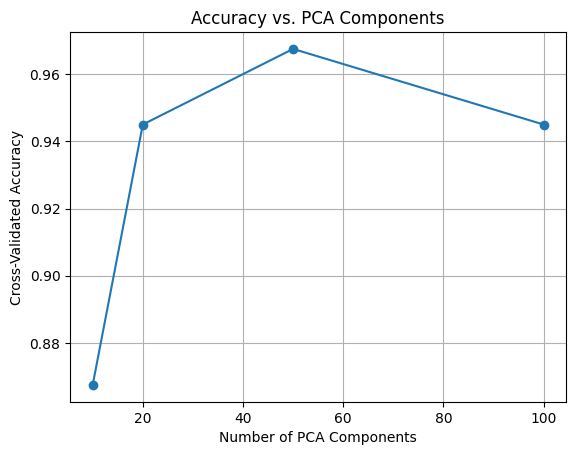

In [6]:
from sklearn.model_selection import cross_val_score

# Test various numbers of PCA components
component_counts = [10, 20, 50, 100]
accuracies = []

for n in component_counts:
    pca_n = PCA(n_components=n, whiten=True)
    X_pca_n = pca_n.fit_transform(X)
    scores = cross_val_score(LogisticRegression(max_iter=1000), X_pca_n, y, cv=5)
    accuracies.append(scores.mean())

plt.plot(component_counts, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Accuracy vs. PCA Components")
plt.grid()
plt.show()


# Exercise: Principal Component Analysis (PCA) and Classification Performance

In this exercise, you will apply PCA to reduce the dimensionality of the Olivetti Faces Dataset.

You will then train and test various classifiers on the PCA-reduced data.

The goal is to explore how different classifiers perform with different amounts of explained variance in PCA.

1) Load the Olivetti Faces Dataset.
2) Apply PCA with varying numbers of components to capture different levels of explained variance (e.g., 80%, 90%, and 95%).
3) For each level of explained variance, reduce the dataset's dimensionality using PCA and train the following classifiers on the transformed data:
- k-Nearest Neighbors (k-NN)
- Parzen Window Classifier (use Gaussian kernel density estimate)
- Logistic Regression

4) Compare the classification accuracy of each classifier across the different levels of explained variance.

5) Analyze and discuss:
5.1) Which classifier performs best with fewer PCA components and why?
5.2) How does the number of components (variance retained) affect each classifier’s performance?